In [83]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('seaborn-muted')

In [84]:
import numpy as np
import math

from scipy.stats import norm

from lint_analysis.token_offsets import Dataset

In [3]:
a = Dataset.from_local('a.json')

In [12]:
def make_bin(offset, bin_count):
    return math.floor(offset * bin_count) if offset < 1 else bin_count-1

In [ ]:
counts = []
for text in a.texts():
    
    row = np.zeros(5)
    
    for offset in text['offsets']:
        b = make_bin(offset, len(row))
        row[b] += 1
        
    counts.append(row / sum(row))

In [71]:
counts = np.stack(counts)

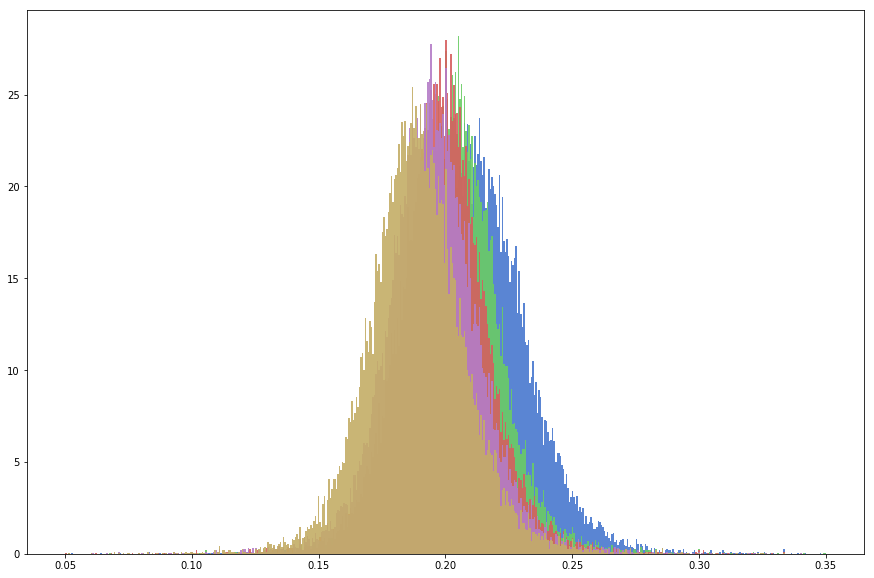

In [93]:
plt.figure(figsize=(15,10))

xlim = (0.05, 0.35)

for i in range(counts.shape[1]):
    data = [c for c in counts[:,i] if c > 0]
    _ = plt.hist(data, bins=500, range=xlim, density=True, alpha=0.9)